<a href="https://colab.research.google.com/github/pandeymuskan30/Data-visualization-/blob/main/K_Means_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means Clustering

Dataset Loaded:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


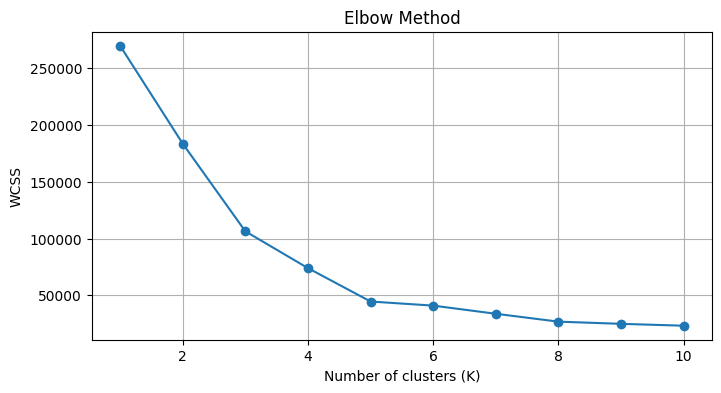

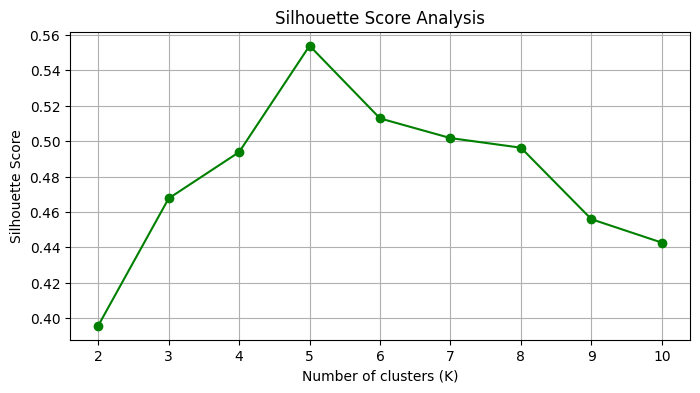

Silhouette Scores: [np.float64(0.39564531743995546), np.float64(0.46761358158775435), np.float64(0.4937945814354117), np.float64(0.553931997444648), np.float64(0.5128405328004378), np.float64(0.5017174409749505), np.float64(0.4962769338093321), np.float64(0.45587414130065596), np.float64(0.4426214845978157)]

Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


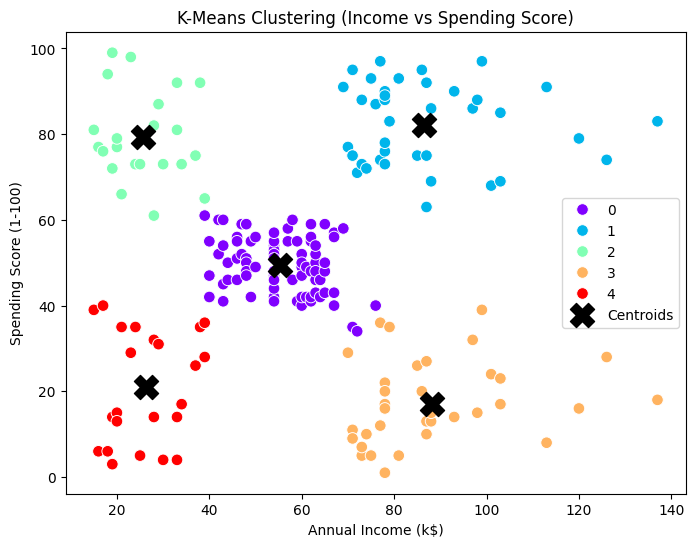


Cluster Analysis:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [ ]:
# -----------------------------------------------------------
# K-MEANS CLUSTERING - Complete Implementation
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# -----------------------------------------------------------
# 1. LOAD DATA
# -----------------------------------------------------------
df = pd.read_csv("Mall_Customers.csv")
print("Dataset Loaded:")
print(df.head())

# Features commonly used: Income & Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# -----------------------------------------------------------
# 2. FIND OPTIMAL K USING ELBOW METHOD
# -----------------------------------------------------------
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# -----------------------------------------------------------
# 3. FIND OPTIMAL K USING SILHOUETTE SCORE
# -----------------------------------------------------------
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color="green")
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

print("Silhouette Scores:", silhouette_scores)

# -----------------------------------------------------------
# 4. CHOOSE OPTIMAL K (usually 5)
# -----------------------------------------------------------
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("\nClustered Data:")
print(df.head())

# -----------------------------------------------------------
# 5. VISUALIZE CLUSTERS
# -----------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette="rainbow",
    s=70
)

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, marker='X', label="Centroids")

plt.title("K-Means Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# -----------------------------------------------------------
# 6. CLUSTER ANALYSIS
# -----------------------------------------------------------
cluster_analysis = df.groupby("Cluster")[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Analysis:")
print(cluster_analysis)

